# DL Lab 4
# Shresht Mishra
# 211020450

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

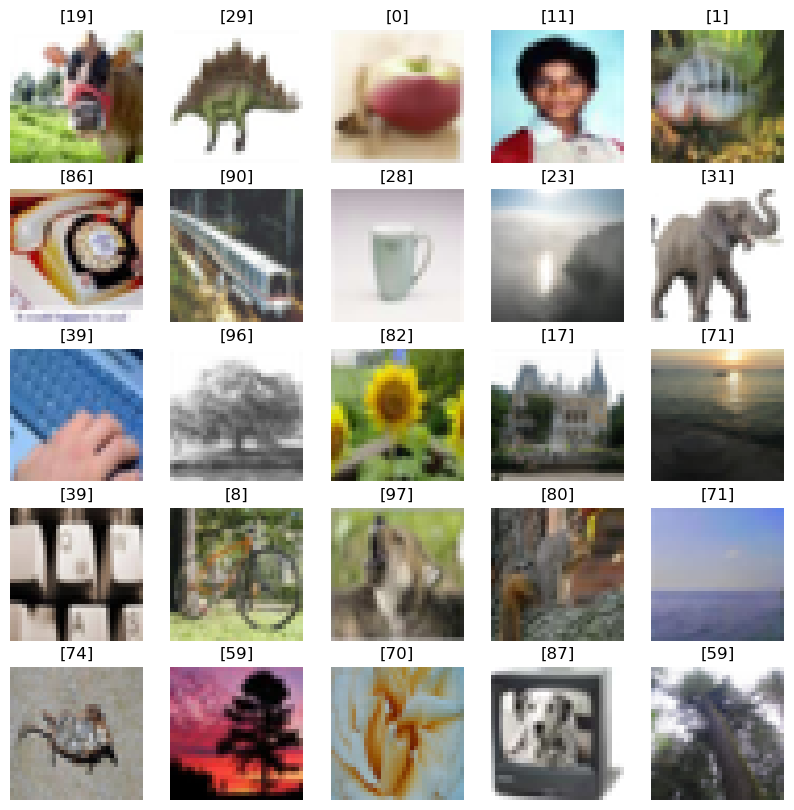

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## 1. Apply Convolutional Neural Network (CNN) to train and compile the model.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
num_epochs = 10
history = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 4.0169 - accuracy: 0.0841 - val_loss: 3.6309 - val_accuracy: 0.1497
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 3.3700 - accuracy: 0.1879 - val_loss: 3.2052 - val_accuracy: 0.2179
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.0770 - accuracy: 0.2442 - val_loss: 3.0102 - val_accuracy: 0.2607
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.8911 - accuracy: 0.2790 - val_loss: 2.9115 - val_accuracy: 0.2858
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.7559 - accuracy: 0.3060 - val_loss: 2.8065 - val_accuracy: 0.3027
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.6454 - accuracy: 0.3295 - val_loss: 2.7556 - val_accuracy: 0.3154
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5604 - accuracy: 0.3473 - val_loss: 2.7069 - val_a

## 2. Apply different number of convolutional layer + kernel size + channel number to progress good accuracy.

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7598 - accuracy: 0.1255 - val_loss: 3.3477 - val_accuracy: 0.2020
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 3.0774 - accuracy: 0.2448 - val_loss: 2.9715 - val_accuracy: 0.2717
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.7752 - accuracy: 0.3038 - val_loss: 2.7668 - val_accuracy: 0.3175
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5520 - accuracy: 0.3469 - val_loss: 2.6516 - val_accuracy: 0.3377
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3829 - accuracy: 0.3837 - val_loss: 2.6263 - val_accuracy: 0.3462
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2459 - accuracy: 0.4123 - val_loss: 2.5331 - val_accuracy: 0.3651
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1272 - accuracy: 0.4367 - val_loss: 2.5355 - val_ac

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy}')

313/313 - 1s - loss: 3.0756 - accuracy: 0.3651 - 709ms/epoch - 2ms/step
Test accuracy: 0.3650999963283539


## 3. Implement the CNN model with different type of pooling method and discuss the interpretation happen due to these changes.

In [4]:
def create_cnn_model(pooling_method='max'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2))) if pooling_method == 'max' else None
    model.add(AveragePooling2D((2, 2))) if pooling_method == 'average' else None
    model.add(GlobalAveragePooling2D()) if pooling_method == 'global_average' else None
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2))) if pooling_method == 'max' else None
    model.add(AveragePooling2D((2, 2))) if pooling_method == 'average' else None
    model.add(GlobalAveragePooling2D()) if pooling_method == 'global_average' else None
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    return model

In [5]:
pooling_methods = ['max', 'average']

In [6]:
history_dict = {}
for method in pooling_methods:
    model = create_cnn_model(pooling_method=method)
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    num_epochs = 10
    history = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))
    history_dict[method] = history
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    print(f'Model with {method} pooling - Test accuracy: {test_accuracy}')

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 3.5744 - accuracy: 0.1645 - val_loss: 3.0213 - val_accuracy: 0.2621
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 2.8009 - accuracy: 0.3055 - val_loss: 2.7180 - val_accuracy: 0.3254
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.4638 - accuracy: 0.3729 - val_loss: 2.5692 - val_accuracy: 0.3584
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 2.2308 - accuracy: 0.4207 - val_loss: 2.5656 - val_accuracy: 0.3529
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0448 - accuracy: 0.4633 - val_loss: 2.5542 - val_accuracy: 0.3710
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8738 - accuracy: 0.5011 - val_loss: 2.5600 - val_accuracy: 0.3792
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7170 - accuracy: 0.5328 - val_loss: 2.5482 - val

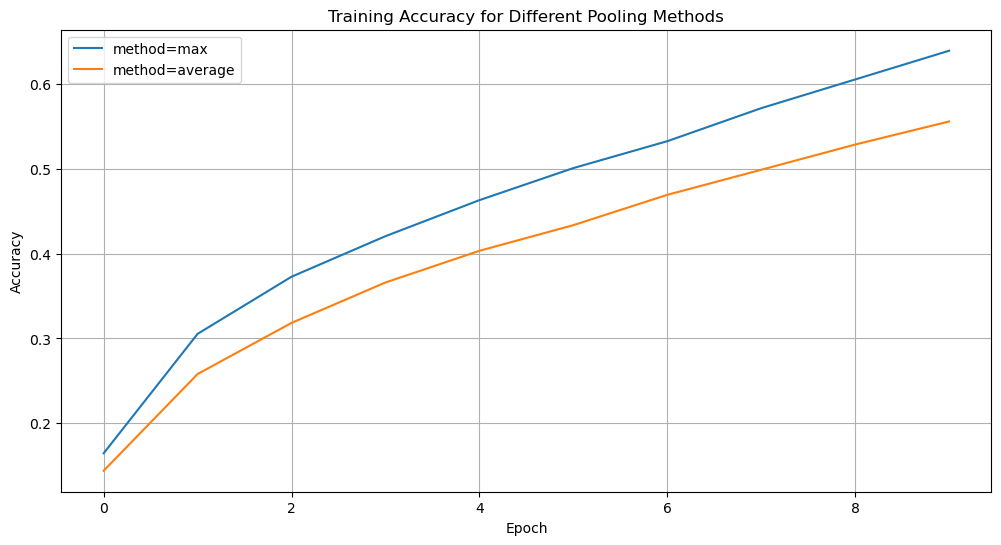

In [7]:
plt.figure(figsize=(12, 6))
for method, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'method={method}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Pooling Methods')
plt.legend()
plt.grid()
plt.show()

## 4. Apply different number of Stride and Padding techniques used for good result in CNN.

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), strides=(2, 2), padding='same'))
model.add(MaxPooling2D((2, 2)))
# Convolutional Layer 2 with a 1x1 stride
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
# Convolutional Layer 3 with a 2x2 stride
model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_images, train_labels, epochs=num_epochs, 
                    validation_data=(test_images, test_labels))

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3.8203 - accuracy: 0.1106 - val_loss: 3.3321 - val_accuracy: 0.1942
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3.1628 - accuracy: 0.2212 - val_loss: 3.0486 - val_accuracy: 0.2488
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8740 - accuracy: 0.2774 - val_loss: 2.8334 - val_accuracy: 0.2936
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6739 - accuracy: 0.3186 - val_loss: 2.7829 - val_accuracy: 0.3016
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5211 - accuracy: 0.3481 - val_loss: 2.6427 - val_accuracy: 0.3353
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4071 - accuracy: 0.3716 - val_loss: 2.5903 - val_accuracy: 0.3415
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2971 - accuracy: 0.3959 - val_loss: 2.5871 - val_accuracy:

## 5. Adjust the CNN model with the various hyper parameter tuning (Optimizer, Activation function, epoch, Learning rate etc.)

In [20]:
def create_cnn_model_best(optimizer='adam', activation='relu', num_epochs=10, learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    model.add(Dense(100, activation='softmax'))
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [24]:
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'sigmoid'],
    'num_epochs': [10, 20],
    'learning_rate': [0.001, 0.01]
}

In [25]:
best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    model = create_cnn_model_best(**params)
    history = model.fit(train_images, train_labels, epochs=params['num_epochs'], verbose=0)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f'Hyperparameters: {params}')
    print(f'Test accuracy: {test_accuracy}')
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_params = params


Hyperparameters: {'activation': 'relu', 'learning_rate': 0.001, 'num_epochs': 10, 'optimizer': 'adam'}
Test accuracy: 0.3698999881744385
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.001, 'num_epochs': 10, 'optimizer': 'sgd'}
Test accuracy: 0.09109999984502792
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.001, 'num_epochs': 20, 'optimizer': 'adam'}
Test accuracy: 0.33570000529289246
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.001, 'num_epochs': 20, 'optimizer': 'sgd'}
Test accuracy: 0.1525000035762787
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.01, 'num_epochs': 10, 'optimizer': 'adam'}
Test accuracy: 0.009999999776482582
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.01, 'num_epochs': 10, 'optimizer': 'sgd'}
Test accuracy: 0.3001999855041504
Hyperparameters: {'activation': 'relu', 'learning_rate': 0.01, 'num_epochs': 20, 'optimizer': 'adam'}
Test accuracy: 0.009999999776482582
Hyperparameters: {'activation': 'relu', '

In [26]:
print("\nBest hyperparameters:")
print(best_params)
print("Best test accuracy:", best_accuracy)


Best hyperparameters:
{'activation': 'relu', 'learning_rate': 0.001, 'num_epochs': 10, 'optimizer': 'adam'}
Best test accuracy: 0.3698999881744385
